In [1]:
import json
import numpy as np
import pandas as pd

In [67]:
with open('../EvolutionaryFramework/results/2023_03_21_18:44:06/result_0.json') as user_file:
  parsed_json = json.load(user_file)
  
# print(json.dumps(parsed_json, indent = 4, sort_keys=True))

In [68]:
data = []
for algorithm in parsed_json:
    for generation in parsed_json[algorithm]:
        for front in parsed_json[algorithm][generation]:
            for individual in parsed_json[algorithm][generation][front]:
                data.append({
                    'algorithm': algorithm,
                    'generation': generation,
                    'front': front,
                    'genome': individual["genome"],
                    'stability': individual["fitness"]["stability"],
                    'tension': individual["fitness"]["tension"]
                })
data_df = pd.DataFrame(data)        

In [69]:
data_df.head()

,algorithm,generation,front,genome,stability,tension
0,NSGA-II,generation_99,front_6,55/0.5 55/0.0625 77/0.0625 67/0.1875 72/0.0625...,-170.0,-520.0
1,NSGA-II,generation_99,front_6,72/0.125 84/0.1875 74/0.3125 56/0.25 66/0.0625...,-175.0,-515.0
2,NSGA-II,generation_99,front_6,52/0.25 57/0.4375 55/0.1875 55/0.0625 73/0.062...,-235.0,-380.0
3,NSGA-II,generation_99,front_6,78/0.8125 62/0.0625 48/0.0625 66/0.0625 57/0.6...,-490.0,-285.0
4,NSGA-II,generation_99,front_6,65/0.0625 49/0.5 70/0.3125 76/0.0625 59/0.0625...,-345.0,-330.0


In [70]:
data_df.loc[0]

algorithm                                               NSGA-II
generation                                        generation_99
front                                                   front_6
genome        55/0.5 55/0.0625 77/0.0625 67/0.1875 72/0.0625...
stability                                                -170.0
tension                                                  -520.0
Name: 0, dtype: object

In [71]:
generation = data_df[data_df["generation"] == "generation_500"].sort_values(by=['front'])

In [72]:
X, Y = [], []
for front in generation["front"].unique():
    X_front, Y_front = [], []
    front_data = generation[generation["front"] == front]
    for stability in front_data["stability"]:
        X_front.append(stability)
    for tension in front_data["tension"]:
        Y_front.append(tension)
    X.append(X_front)
    Y.append(Y_front)

In [73]:
import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

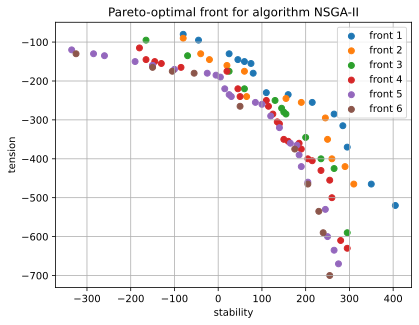

In [74]:
fig, ax = plt.subplots()
ax.set_title("Pareto-optimal front for algorithm NSGA-II")
ax.set_xlabel("stability")
ax.set_ylabel("tension")
ax.grid()

for i, (x,y) in enumerate(zip(X, Y)):
    
    ax.scatter(x, y, label = f"front {i+1}")

plt.legend()
plt.show()


In [75]:
stability = generation[generation["front"] == "front_1"].sort_values(by='stability')

In [76]:
stability.loc[2285]['genome']

'0/0.25 68/0.0625 60/0.0625 60/0.125 72/0.125 74/0.0625 72/0.125 79/0.0625 84/0.0625 60/0.0625 55/0.0625 67/0.0625 71/0.125 59/0.125 62/0.0625 R/0.3125 55/0.125 55/0.0625 52/0.0625 64/0.125 69/0.125 69/0.0625 69/0.125 60/0.0625 81/0.0625 76/0.1875 69/0.125 71/0.0625 69/0.0625 81/0.1875 53/0.3125 58/0.3125 57/0.0625 69/0.0625 63/0.0625 '